# 实现一个简单的TPE算法

## 准备工作

### 导入库

In [24]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, Dataset
from torch import optim

import torchvision
import torchvision.transforms as transforms
from typing import List, Union, Tuple

In [25]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using {device}")

using cuda


### 准备数据集

In [26]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

train_set = torchvision.datasets.CIFAR10(root='./data', train=True,
                                         download=True, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                           shuffle=True, num_workers=2)

test_set = torchvision.datasets.CIFAR10(root='./data', train=False,
                                        download=True, transform=transform)
test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                          shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


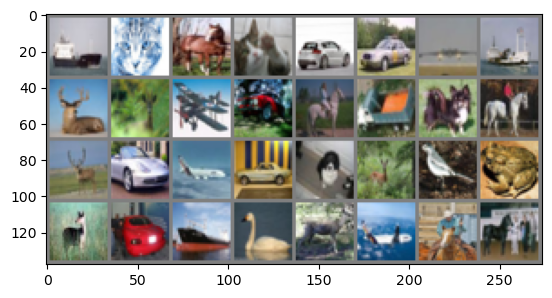

ship  cat   horse cat   car   car   plane ship  deer  deer  plane car   horse truck dog   horse deer  car   plane car   dog   deer  bird  frog  deer  car   ship  bird  deer  plane horse horse


In [27]:
# functions to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

## 实现TPE

In [28]:
from tpe import *

In [29]:
def test_target(x, y):
    return np.sin(np.sqrt(x ** 2 + y ** 2))

In [30]:
optimize(test_target, 100, {'x': (-6, 6), 'y': (-6, 6)})

({'x': -2.621083462586949, 'y': -3.8878206424229864}, -0.9997227539544874)
({'x': -2.621083462586949, 'y': -3.8878206424229864}, -0.9997227539544874)
({'x': -2.621083462586949, 'y': -3.8878206424229864}, -0.9997227539544874)
({'x': -2.621083462586949, 'y': -3.8878206424229864}, -0.9997227539544874)
({'x': -2.621083462586949, 'y': -3.8878206424229864}, -0.9997227539544874)
({'x': -2.6852719960482974, 'y': -3.891916034898367}, -0.9998719455983717)
({'x': -2.6852719960482974, 'y': -3.891916034898367}, -0.9998719455983717)
({'x': -2.6852719960482974, 'y': -3.891916034898367}, -0.9998719455983717)
({'x': -2.6852719960482974, 'y': -3.891916034898367}, -0.9998719455983717)
({'x': -2.1479387319465326, 'y': -4.192918037404524}, -0.9999991332112698)
({'x': -2.1479387319465326, 'y': -4.192918037404524}, -0.9999991332112698)
({'x': -2.1479387319465326, 'y': -4.192918037404524}, -0.9999991332112698)
({'x': -2.1479387319465326, 'y': -4.192918037404524}, -0.9999991332112698)
({'x': -2.147938731946532

({'x': -2.1479387319465326, 'y': -4.192918037404524}, -0.9999991332112698)

我们将TPE与随机搜索比较

({'x': 4.010773607234096, 'y': 3.046538077608755}, -0.9478909861850249)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937946143)
({'x': -4.312092349106727, 'y': 1.944587385885037}, -0.999839937

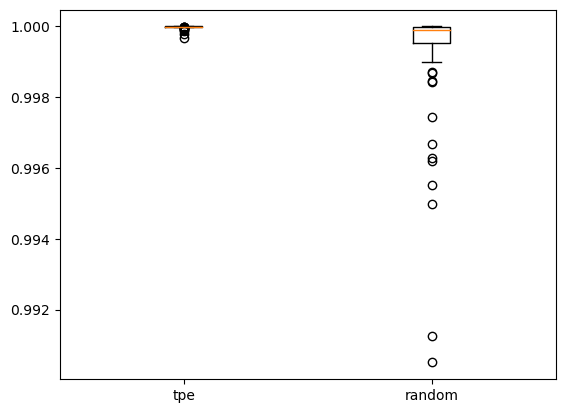

In [31]:
rand_res = [-optimize(test_target, 100, {'x': (-6, 6), 'y': (-6, 6)}, pure_random=True)[-1] for i in range(100)]
tpe_res = [-optimize(test_target, 100, {'x': (-6, 6), 'y': (-6, 6)})[-1] for i in range(100)]

plt.boxplot([tpe_res, rand_res], labels=["tpe", "random"])
plt.show()

可以看到，TPE发挥稳定且出色。下面试试量子化的抽取功能。

In [32]:
optimize(test_target, 100, {'x': list(range(-6, 6)), 'y': (-6, 6)})

({'x': 4, 'y': -2.1459959982312498}, -0.9850584953957334)
({'x': 4, 'y': 2.7340929322342173}, -0.9912031202781714)
({'x': 4, 'y': 2.7340929322342173}, -0.9912031202781714)
({'x': 4, 'y': 2.7340929322342173}, -0.9912031202781714)
({'x': 4, 'y': 2.7340929322342173}, -0.9912031202781714)
({'x': 4, 'y': 2.7340929322342173}, -0.9912031202781714)
({'x': -2, 'y': -4.40729786559873}, -0.9918861751933419)
({'x': -1, 'y': -4.547433676186819}, -0.9984155037608098)
({'x': -1, 'y': -4.547433676186819}, -0.9984155037608098)
({'x': -1, 'y': -4.547433676186819}, -0.9984155037608098)
({'x': -1, 'y': -4.547433676186819}, -0.9984155037608098)
({'x': -1, 'y': -4.580610188557136}, -0.9997145634755442)
({'x': 1, 'y': -4.5872009159271725}, -0.9998476786696003)
({'x': 1, 'y': -4.5872009159271725}, -0.9998476786696003)
({'x': 1, 'y': -4.5872009159271725}, -0.9998476786696003)
({'x': 1, 'y': -4.606971362341849}, -0.9999982619674789)
({'x': 1, 'y': -4.606971362341849}, -0.9999982619674789)
({'x': 1, 'y': -4.6069

({'x': 1, 'y': -4.606971362341849}, -0.9999982619674789)

表现很好！接下来就可以用来条超参了。

In [41]:
class Net(nn.Module):
    def __init__(self, n_conv, n_flat, width_conv, width_flat, kernel_size):
        super().__init__()
        image_width = 32
        self.model = nn.Sequential()
        width_flat = round(width_flat)
        width_conv = round(width_conv)
        n_flat = round(n_flat)
        n_conv = round(n_conv)
        self.model.append(nn.Conv2d(3, width_conv, 2 * kernel_size + 1))
        image_width -= kernel_size * 2
        for i in range(n_conv):
            self.model.append(nn.Conv2d(width_conv, width_conv, 2 * kernel_size + 1))
            image_width -= kernel_size * 2
            self.model.append(nn.ReLU())
            self.model.append(nn.MaxPool2d(2, 2))
            image_width = int((image_width - 2) / 2 + 1)

        self.model.append(nn.Flatten())
        self.model.append(nn.Linear(image_width**2*width_conv, width_flat))
        for i in range(n_flat):
            self.model.append(nn.Linear(width_flat, width_flat))
            self.model.append(nn.ReLU())
        self.model.append(nn.Linear(width_flat, 10))

    def forward(self, x):
        return self.model(x)

def target(opt, lr, **kwargs):
    net = Net(**kwargs)
    net.to(device)
    criterion = nn.CrossEntropyLoss()
    if opt:
        optimizer = optim.SGD(net.parameters(), lr=10**lr, momentum=0.9)
    else:
        optimizer = optim.Adam(net.parameters(), lr=10**lr)
    l = 0
    print(opt, lr, kwargs)
    for epoch in range(2):  # loop over the dataset multiple times
        running_loss = 0.0
        for i, data in enumerate(train_loader, 0):
            # get the inputs; data is a list of [inputs, labels]
            inputs, labels = data
            inputs = inputs.to(device)
            labels = labels.to(device)

            # zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize
            outputs = net(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            if (i+1) % 125 == 0:    # print every 2000 mini-batches
                print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 125:.3f}')
                l = running_loss / 125
                running_loss = 0.0
    return l

In [42]:
optimize(target, 100, space={
    "opt": [0, 1],
    "lr": (-4, -2),
    "n_conv": (0, 2),
    "n_flat": (0, 4),
    "width_conv": [3, 5],
    "width_flat": (10, 300),
    "kernel_size": [1, 2],
})

#0
1 -3.0100947055437226 {'n_conv': 1.0588839021241179, 'n_flat': 1.7542491850056878, 'width_conv': 3, 'width_flat': 109.74574749345257, 'kernel_size': 1}
[1,   125] loss: 2.304
[1,   250] loss: 2.301
[1,   375] loss: 2.299
[1,   500] loss: 2.293
[1,   625] loss: 2.283
[1,   750] loss: 2.266
[1,   875] loss: 2.238
[1,  1000] loss: 2.202
[1,  1125] loss: 2.177
[1,  1250] loss: 2.149
[1,  1375] loss: 2.127
[1,  1500] loss: 2.096
[2,   125] loss: 2.071
[2,   250] loss: 2.046
[2,   375] loss: 2.021
[2,   500] loss: 2.010
[2,   625] loss: 1.983
[2,   750] loss: 1.950
[2,   875] loss: 1.950
[2,  1000] loss: 1.951
[2,  1125] loss: 1.923
[2,  1250] loss: 1.927
[2,  1375] loss: 1.928
[2,  1500] loss: 1.874
#1
0 -3.475036703263082 {'n_conv': 0.5595278908676646, 'n_flat': 1.840095459977158, 'width_conv': 5, 'width_flat': 294.12379005291905, 'kernel_size': 2}
[1,   125] loss: 2.065
[1,   250] loss: 1.872
[1,   375] loss: 1.742
[1,   500] loss: 1.675
[1,   625] loss: 1.631
[1,   750] loss: 1.562
[1

({'opt': 0,
  'lr': -2.719736919570855,
  'n_conv': 1.3776511643268932,
  'n_flat': 1.8749976045774481,
  'width_conv': 5,
  'width_flat': 197.8040015136133,
  'kernel_size': 1},
 1.2080586376190185)

用该组超参数重新创建模型（随机初始化不同）并训练同样2 epochs后，得到了56%的准确率，较官方样例（同样也是2 epochs）的50%准确率有所提升，由此体现了TPE算法的有效性。